In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/trevm/OneDrive/Documents/DA coding projects/scottish_salmon/SalmonandSeaTroutNets1952-2022.csv")


Now that we have loaded our data and libraries we can scope our data! This is a dataset on Industrial Fishing records in Scotland from 1952 to 2022.

In [2]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                23140 non-null  object 
 1   District ID             23140 non-null  float64
 2   Report order            23140 non-null  float64
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  float64
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  float64
 8   Wild MSW number         23140 non-null  float64
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  float64
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  float64
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

From our Data Analysis, we know that the region of Orkney only has 3 total recorded catches in our data set out of a total off 25,000. We will be dropping this region to have a cleaner set of data on our other 9 more significant regions and may take a look at Orkney specifically later. Orkney's three records are located at indices 22834-22836. 

In [3]:
orkney = df[df['Region'] == 'Orkney']

print(orkney.info())
print(orkney.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 22834 to 22836
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                3 non-null      object 
 1   District ID             3 non-null      float64
 2   Report order            3 non-null      float64
 3   Region                  3 non-null      object 
 4   Method                  3 non-null      object 
 5   Year                    3 non-null      float64
 6   Month                   3 non-null      object 
 7   Month number            3 non-null      float64
 8   Wild MSW number         3 non-null      float64
 9   Wild MSW weight (kg)    3 non-null      float64
 10  Wild 1SW number         3 non-null      float64
 11  Wild 1SW weight (kg)    3 non-null      float64
 12  Sea trout number        3 non-null      float64
 13  Sea trout weight (kg)   3 non-null      float64
 14  Finnock number          3 non-null      flo

In [4]:
indices_to_drop = [22834, 22835, 22836]
df = df.drop(indices_to_drop)


Now that we have dropped that semi-irrelevant data we can start formatting our data to be able to make visualizations.

Since we are looking to make our first Machine Learning Model with a target variable of "Region", lets scope our data with regional data in mind.

In [5]:
print(df['Region'].nunique())


region_counts = df.groupby("Region").count()

print(region_counts.head())

9
             District  District ID  Report order  Method  Year  Month  \
Region                                                                  
Clyde Coast      2096         2096          2096    2096  2096   2096   
East             2061         2061          2061    2061  2061   2061   
Moray Firth      3105         3105          3105    3105  3105   3105   
North            2744         2744          2744    2744  2744   2744   
North East       3983         3983          3983    3983  3983   3983   

             Month number  Wild MSW number  Wild MSW weight (kg)  \
Region                                                             
Clyde Coast          2096             2096                  2096   
East                 2061             2061                  2061   
Moray Firth          3105             3105                  3105   
North                2744             2744                  2744   
North East           3983             3983                  3983   

         

Now let's group our data by each major fish group: Wild salmon, sea trout, and farmed salmon

In [7]:
wild_salmon = ['Wild MSW number', 'Wild 1SW number']

trout = ['Sea trout number', 'Finnock number']

farmed_salmon = ['Farmed MSW number', 'Farmed 1SW number']

total_ws = df[wild_salmon].sum(axis=1)

total_trout = df[trout].sum(axis=1)

total_fs = df[farmed_salmon].sum(axis=1)

Now we can apply our grouping by region to be able to first scope (and then later visualize) which fish are caught where.

In [8]:
ws_by_region = df.groupby('Region')[wild_salmon].sum()

trout_by_region = df.groupby('Region')[trout].sum()

fs_by_region = df.groupby('Region')[farmed_salmon].sum()

print(ws_by_region.head())


             Wild MSW number  Wild 1SW number
Region                                       
Clyde Coast          97054.0         180367.0
East               1791345.0        1808318.0
Moray Firth         843482.0        1607428.0
North               500659.0         996302.0
North East         1599954.0        2246195.0


Another important data measure we may want some insight into is the average weight per fish, as it could help clarify some of our regional data, such as netting effort by region, as well as providing insight into the different types of fish in our dataset.

In [9]:
def calculate_average_weight(df, category, number_column, weight_column):
    sum_number = df[number_column].sum()
    sum_weight = df[weight_column].sum()
    if sum_number == 0:
        print(f"No {category} data available.")
        return None
    else:
        avg_weight = sum_weight / sum_number
        print(f"Average {category} weight is about {avg_weight:.2f} kg")
        return avg_weight

categories = [
    ("Wild MSW", "Wild MSW number", "Wild MSW weight (kg)"),
    ("Wild 1SW", "Wild 1SW number", "Wild 1SW weight (kg)"),
    ("Sea trout", "Sea trout number", "Sea trout weight (kg)"),
    ("Finnock", "Finnock number", "Finnock weight (kg)"),
    ("Farmed MSW", "Farmed MSW number", "Farmed MSW weight (kg)"),
    ("Farmed 1SW", "Farmed 1SW number", "Farmed 1SW weight (kg)")
]

categories_data = []
avg_weights = []

for category, number_col, weight_col in categories:
    avg_weight = calculate_average_weight(df, category, number_col, weight_col)
    if avg_weight is not None:
        categories_data.append(category)
        avg_weights.append(avg_weight)



Average Wild MSW weight is about 4.85 kg
Average Wild 1SW weight is about 2.55 kg
Average Sea trout weight is about 1.13 kg
Average Finnock weight is about 0.79 kg
Average Farmed MSW weight is about 4.36 kg
Average Farmed 1SW weight is about 2.58 kg


Pie Charts!

Our first pie chart will simply look at our total count of fishing records by region. This will help us see which regions are more or less significant than others for our dataset.

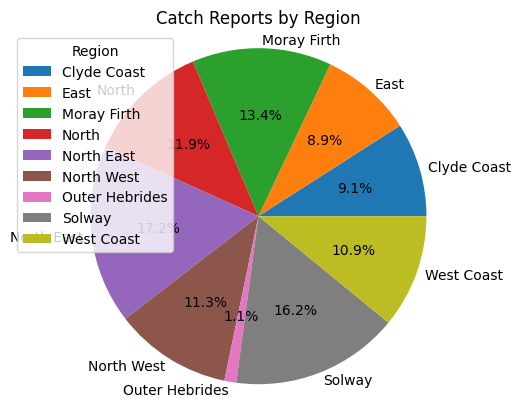

<Figure size 640x480 with 0 Axes>

In [10]:
fig1 = plt.figure()

plt.pie(region_counts['Netting effort'], labels=region_counts.index, autopct='%1.1f%%', labeldistance=1.05)
plt.axis('equal')
plt.title("Catch Reports by Region")
plt.legend(title='Region', loc='upper left')
plt.show()
plt.clf()


We want to also look at proportions of total fish caught as that could be very useful data whenb making insights, especially since we have already done some scoping on the count of fish in each region. 

We will first need to define a function to calculate our proportions and then build our pie chart.

In [11]:
def calculate_fish_proportion(df, categories):
    total_fish = sum(df[number_col].sum() for _, number_col, _ in categories)
    fish_proportions = {}
    
    other_proportion = 0
    for category, number_col, _ in categories:
        if category in ["Finnock", "Farmed MSW", "Farmed 1SW"]:
            other_proportion += df[number_col].sum()
        else:
            fish_count = df[number_col].sum()
            fish_proportion = fish_count / total_fish
            fish_proportions[category] = fish_proportion
    
    if other_proportion > 0:
        fish_proportions["Other"] = other_proportion / total_fish

    return fish_proportions

In [12]:
fish_proportions = calculate_fish_proportion(df, categories)
print("Proportion of each fish category compared to the total of all fish:")
for category, proportion in fish_proportions.items():
    print(f"{category}: {proportion:.5f}")

Proportion of each fish category compared to the total of all fish:
Wild MSW: 0.28965
Wild 1SW: 0.42749
Sea trout: 0.28260
Other: 0.00026


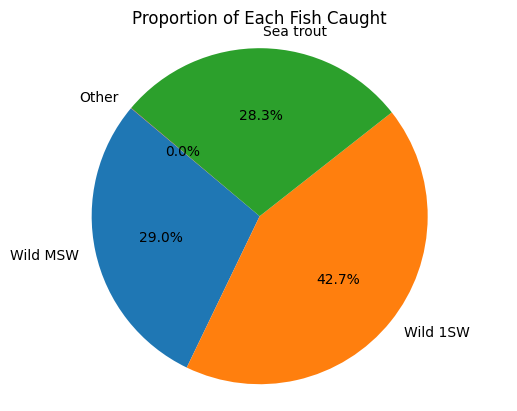

<Figure size 640x480 with 0 Axes>

In [14]:
labels = list(fish_proportions.keys())
sizes = list(fish_proportions.values())

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Each Fish Caught')
plt.show()
plt.clf()

Our 3 most significant fish caught are 1. Wild One-sea Winter Salmon, 2. Wild Multi-sea Winter Salmon, and 3. Sea trout - the rest of our fish (both of our farmed salmon as well as Finnock sea trout) have been grouped into the "Other" column

As you can see our Other column is 0.0% proportionally to our total amount of fish caught, this is not a typo the true value of all 3 together can be seen in our scoping above the graph and is 0.00026% of our data.

Bar Graphs!

We will be building Bar graphs to visualize our Average Weight of Fish to start.

Then, our other bar graphs will showcase our grouped fish from much earlier with options of Farmed Salmon, Sea Trout (including Finnock), and Wild Salmon. We want to see how each region compares to the others in respect to catching these Fish as well as which regions stand out the most. 

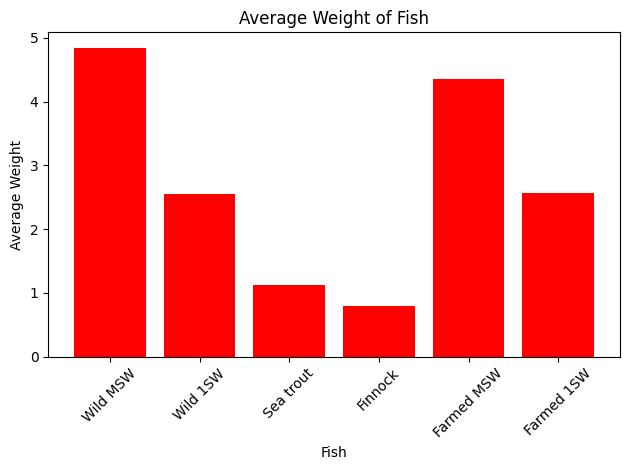

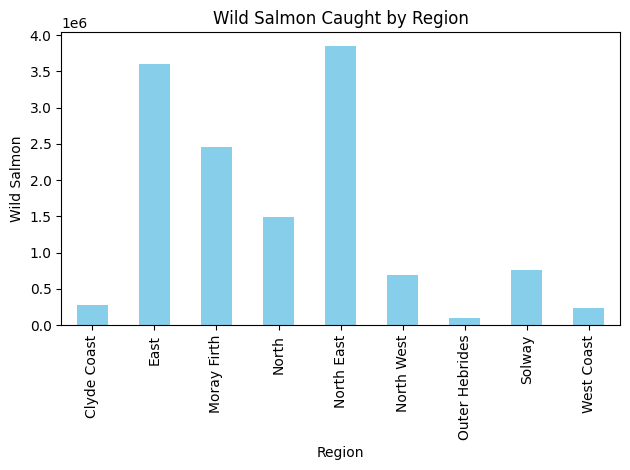

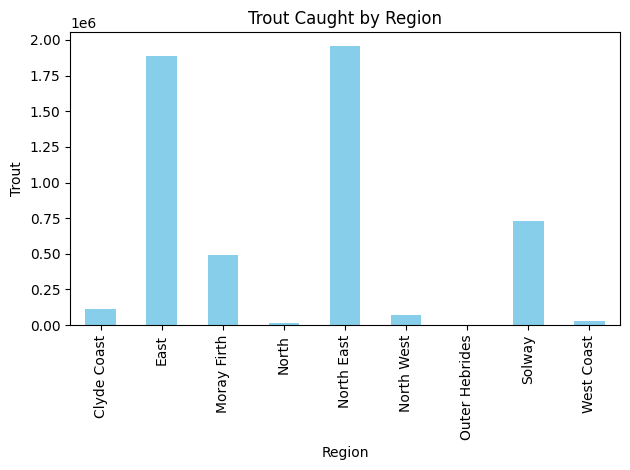

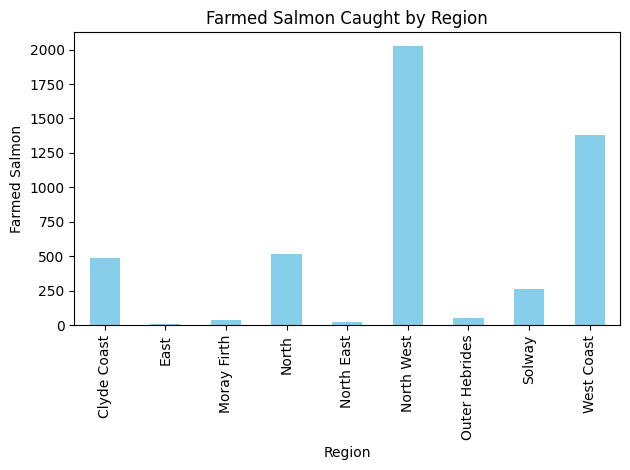

<Figure size 640x480 with 0 Axes>

In [41]:
plt.bar(categories_data, avg_weights, color='red')
plt.xlabel("Fish")
plt.ylabel("Average Weight")
plt.title("Average Weight of Fish")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()


ws_by_region.sum(axis=1).plot(kind='bar', color='skyblue')
plt.title("Wild Salmon Caught by Region")
plt.xlabel("Region")
plt.ylabel("Wild Salmon")
plt.tight_layout()
plt.show()
plt.clf()

trout_by_region.sum(axis=1).plot(kind='bar', color='skyblue')
plt.title("Trout Caught by Region")
plt.xlabel("Region")
plt.ylabel("Trout")
plt.tight_layout()
plt.show()
plt.clf()

fs_by_region.sum(axis=1).plot(kind='bar', color='skyblue')
plt.title("Farmed Salmon Caught by Region")
plt.xlabel("Region")
plt.ylabel("Farmed Salmon")
plt.tight_layout()
plt.show()
plt.clf()

Our heaviest fish in general are Multi-sea Winter Salmon with wild being the heaviest and farmed the second. After that is our One-sea Winter Salmon with almost no difference in weight between farmed and wild. Coming in last are our Sea Trout with Finnock being the lightest fish on average recorded.

For our regions, The East and North East regions dominate our wild fishing charts coming out with the most for both Salmon and Trout. For Farmed Salmon, however, we see that they are mostly caught in the North West and on the West Coast. This regional difference is likely not coincidental as East of Scotland is the Atlantic Ocean and West would be the North Sea, and would most likely be due to the habitat of the wild fish being recorded.

Interestingly the Outer Hebrides, a group of islands off of Scotland's east coast, have very low numbers comparatively across the board. This could be due to region size or population since it is connected to both the East and North East regions.

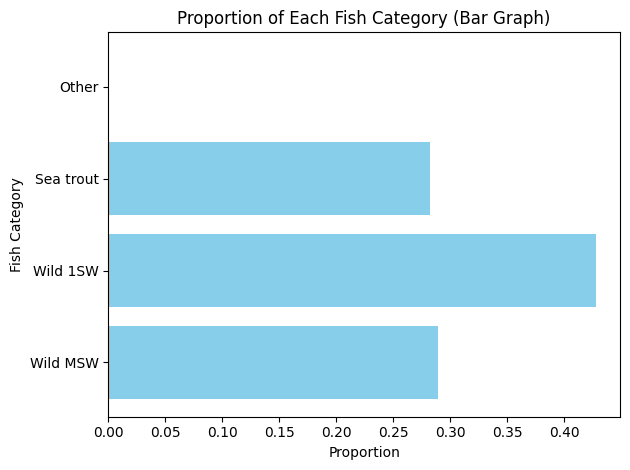

<Figure size 640x480 with 0 Axes>

In [42]:
plt.barh(labels, sizes, color='skyblue')
plt.xlabel('Proportion')
plt.ylabel('Fish Category')
plt.title('Proportion of Each Fish Category (Bar Graph)')

plt.tight_layout()
plt.show()
plt.clf()

Above is a bar graph reshaping for our fish proportions, and is simply here in case a bar graph may be preferred.. although, I believe a pie chart does a much better job at showcasing these proportions.

Stacked Bar Graph!

We want to take a look at Catching Method by Region to get an understanding of if each region has a different preferred catching method. 

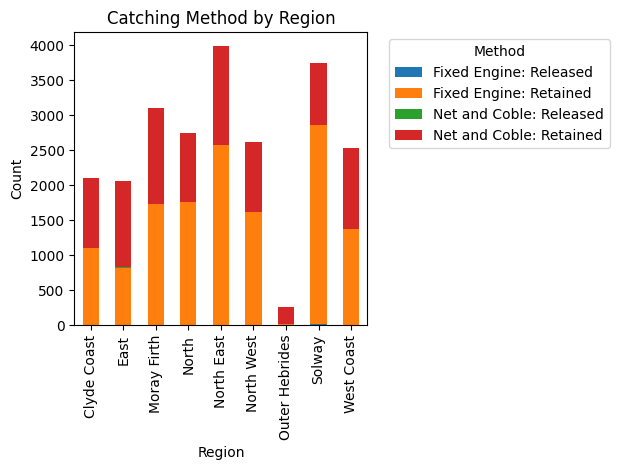

<Figure size 640x480 with 0 Axes>

In [43]:
method_by_region = df.groupby(['Region', 'Method']).size().unstack(fill_value=0)

method_by_region.plot(kind='bar', stacked=True)
plt.title('Catching Method by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()


As you can see, there is a pretty standard distribution of catch methods as Fixed Engine: Retained is the most common method for most of our regions follow by Net and Coble: Retained. However, in the East and Outer Hebrides we can see that Net and Coble: Retained is the most common method. This makes sense due to both being in East Scotland geographically and can be due to the environment being fished in or regulations. 

We can also see two little slivers for our two Released methods. One is in the East for Net and Coble: Released and the other is in Solway for Fixed Engine: Released. Releases are usually determined by either fish size or quantity and while it is interesting that these are the only two regions with significant release numbers, as well as distinct methods, it should be noted that the total released is very insignificant compared to the rest of our dataset.

LinePlots!

We want to do some time-series analysis on the Fishing Industry in general, and the best way to do that is with lineplots showcasing the quantity of fish caught per year over the length of our dataset. With the decision that we would like to look at each fish type over time as well, we also want to keep in line with our regional data analysis and will have a line for each region to visualize how they have each done over the years in catching each fish recorded for our dataset.

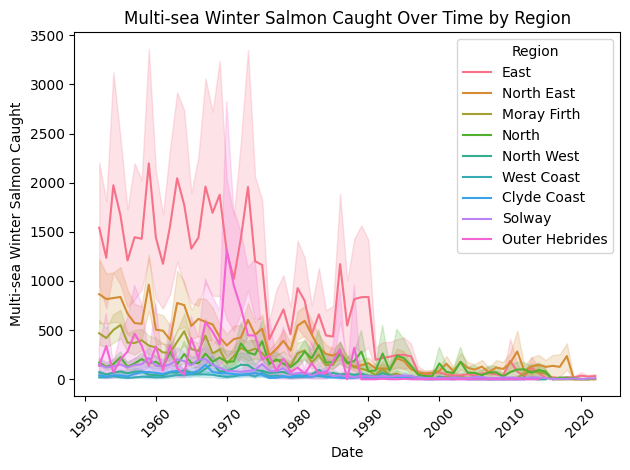

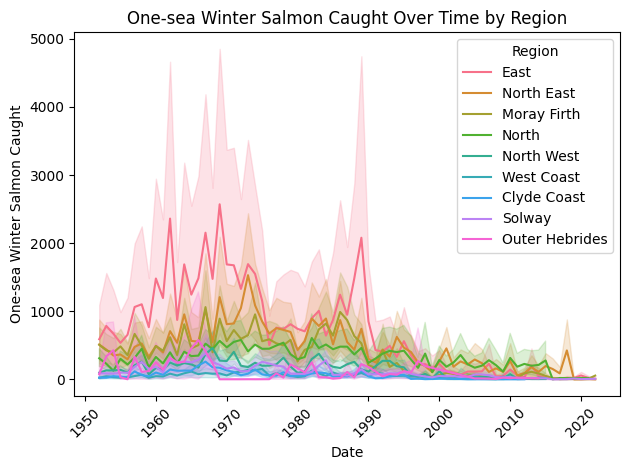

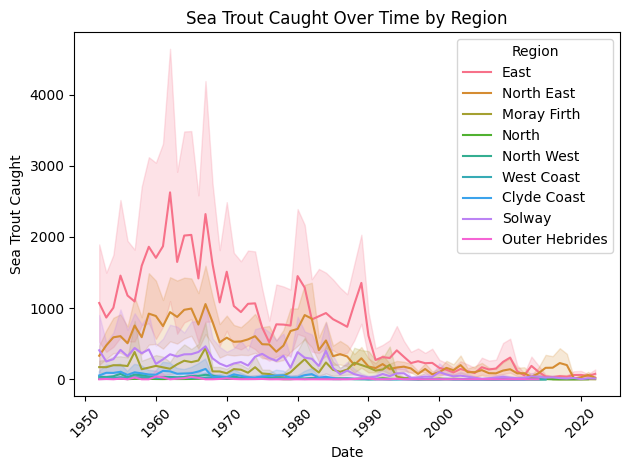

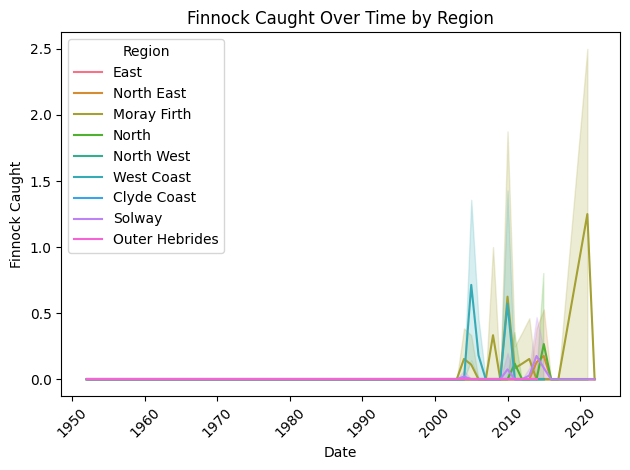

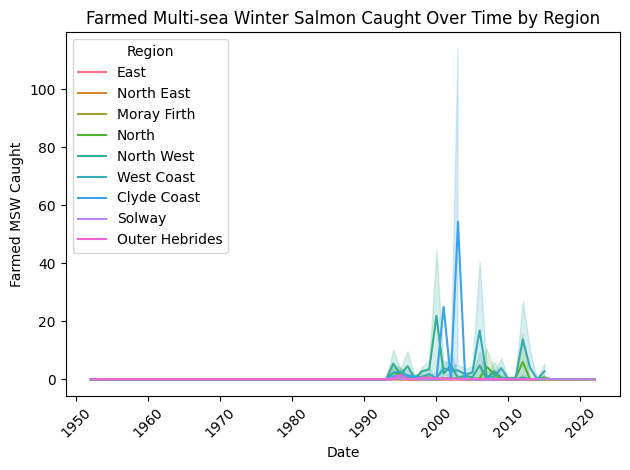

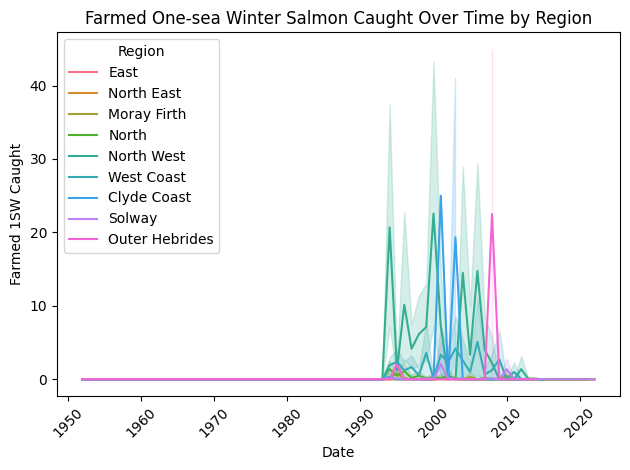

<Figure size 640x480 with 0 Axes>

In [44]:
sns.lineplot(data=df, x='Year', y='Wild MSW number', hue='Region', palette='husl')
plt.title('Multi-sea Winter Salmon Caught Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Multi-sea Winter Salmon Caught')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()


sns.lineplot(data=df, x='Year', y='Wild 1SW number', hue='Region', palette='husl')
plt.title('One-sea Winter Salmon Caught Over Time by Region')
plt.xlabel('Date')
plt.ylabel('One-sea Winter Salmon Caught')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

sns.lineplot(data=df, x='Year', y='Sea trout number', hue='Region', palette='husl')
plt.title('Sea Trout Caught Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Sea Trout Caught')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()


sns.lineplot(data=df, x='Year', y='Finnock number', hue='Region', palette='husl')
plt.title('Finnock Caught Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Finnock Caught')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

sns.lineplot(data=df, x='Year', y='Farmed MSW number', hue='Region', palette='husl')
plt.title('Farmed Multi-sea Winter Salmon Caught Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Farmed MSW Caught')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

sns.lineplot(data=df, x='Year', y='Farmed 1SW number', hue='Region', palette='husl')
plt.title('Farmed One-sea Winter Salmon Caught Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Farmed 1SW Caught')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()


There are quite a few insights we can gain from our time series data. First we can see that the East region of Scotland was dominate in catching wild fish (both Salmon and Sea trout) for most of our time range, but then has a sharp drop off in the early 1990s. We can also see that our Farmed Salmon types were relatively uncaught until the mid 1990s and then catching ceased again in the early-to-mid 2010s. In addition, Finnock were also relatively uncaught until the early 2000s and remain caught today but at varying levels with a high-peak recently in 2020 in Moray Firth. 